In [294]:
import warnings
warnings.filterwarnings('ignore')

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import time

# MNIST HAND WRITTEN NUMBER

Define various neural network structures with tanh, sigmoid, linear, relu, define number of neurons in each layer and forward the input data to one-hot-coding for numbers 0-9. **You are NOT expected to use Convolution Layers!** <br>
*Hint: Input files are 28x28 images.*
<br>
*Hint: Use .view method in the forward function to make a column vector from 28x28 image*


In this assignment, you are expected to train your own Neural Network model. You are free to refer to resources online and bogaziciai github repository while constructing your neural network.  

In [295]:
## Normalization and create a tensor for a training/test set 

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

### Step 1

Defining the structure of the neural network.

In [296]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1,self).__init__()
        # define the layers
        self.layer1 = nn.Linear(28*28, 2000)
        self.layer2 = nn.Linear(2000, 80)
        self.out = nn.Linear(80, 10)

    def forward(self, img): #convert + flatten
        # view() reshapes the tensor without copying memory, similar to numpy's reshape().
        x = img.view(-1, 28*28)
        # forward propagation
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return F.relu(self.out(x))

In [297]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2,self).__init__()
        # define the layers
        self.layer1 = nn.Linear(28*28, 2000)
        self.layer2 = nn.Linear(2000, 80)
        self.out = nn.Linear(80, 10)

    def forward(self, img): #convert + flatten
        # view() reshapes the tensor without copying memory, similar to numpy's reshape().
        x = img.view(-1, 28*28)
        # forward propagation
        x = F.relu(self.layer1(x))
        x = F.sigmoid(self.layer2(x))
        return F.sigmoid(self.out(x))

In [298]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3,self).__init__()
        # define the layers
        self.layer1 = nn.Linear(28*28, 2000)
        self.layer2 = nn.Linear(2000, 80)
        self.out = nn.Linear(80, 10)

    def forward(self, img): #convert + flatten
        # view() reshapes the tensor without copying memory, similar to numpy's reshape().
        x = img.view(-1, 28*28)
        # forward propagation
        x = F.relu(self.layer1(x))
        x = F.tanh(self.layer2(x))
        return F.tanh(self.out(x))

In [299]:
class Net4(nn.Module):
    def __init__(self):
        super(Net4,self).__init__()
        # define the layers
        self.layer1 = nn.Linear(28*28, 512)
        self.layer2 = nn.Linear(512, 512)
        self.layer3 = nn.Linear(512, 64)
        self.out = nn.Linear(64, 10)

    def forward(self, img): #convert + flatten
        # view() reshapes the tensor without copying memory, similar to numpy's reshape().
        x = img.view(-1, 28*28)
        # forward propagation
        x = F.relu(self.layer1(x))
        x = F.tanh(self.layer2(x))
        x = F.tanh(self.layer3(x))
        return F.tanh(self.out(x))

In [300]:
class Net5(nn.Module):
    def __init__(self):
        super(Net5,self).__init__()
        # define the layers
        self.layer1 = nn.Linear(28*28, 128)
        self.layer2 = nn.Linear(128, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 10)

    def forward(self, img): #convert + flatten
        # view() reshapes the tensor without copying memory, similar to numpy's reshape().
        x = img.view(-1, 28*28)
        # forward propagation
        x = F.relu(self.layer1(x))
        x = F.tanh(self.layer2(x))
        x = F.tanh(self.layer3(x))
        x = F.tanh(self.layer4(x))
        return F.tanh(self.out(x))

### Step 2

Deciding on the optimizer, number of batches, loss function and the number of epochs

In [301]:
model = Net3()

loss_calculator = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
batch_size = 64
epochs = 15

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

### Step 3
Start the training.

In [302]:
training_loss_arr = []
test_loss_arr = []
num_of_batches = []
for epoch in range(epochs):
    running_train_loss = 0.0
    for i,train_data in enumerate(train_loader):
        train_inputs, train_labels = train_data

        optimizer.zero_grad()
        train_output = model(train_inputs.view(-1, 28*28))
        train_loss = loss_calculator(train_output, train_labels)
        train_loss.backward()
        optimizer.step()
        
        running_train_loss += train_loss.item()
        if i % 100 == 99:
            total_test_loss = 0.0
            test_data_size = 0
            for j, test_data in enumerate(test_loader):
                test_inputs, test_labels = test_data

                test_output = model(test_inputs.view(-1, 28*28))
                test_loss = loss_calculator(test_output, test_labels)
                total_test_loss += test_loss.item()
                test_data_size += 1
            print(f"[{epoch + 1}, {i + 1:5d}] Training Loss: {running_train_loss / 100:.5f} Test Loss: {total_test_loss/test_data_size:.5f}")
            training_loss_arr.append(running_train_loss / 100)
            test_loss_arr.append(total_test_loss/test_data_size)
            num_of_batches.append(epoch * 900 + i + 1)
            running_train_loss = 0.0
            total_test_loss = 0.0
print('Finished Training')

[1,   100] Training Loss: 1.63116 Test Loss: 1.36141
[1,   200] Training Loss: 1.29847 Test Loss: 1.22386
[1,   300] Training Loss: 1.18850 Test Loss: 1.14468
[1,   400] Training Loss: 1.12867 Test Loss: 1.09701
[1,   500] Training Loss: 1.08942 Test Loss: 1.05985
[1,   600] Training Loss: 1.04956 Test Loss: 1.03712
[1,   700] Training Loss: 1.02190 Test Loss: 1.01063
[1,   800] Training Loss: 1.01103 Test Loss: 0.98744
[1,   900] Training Loss: 1.00055 Test Loss: 0.97732
[2,   100] Training Loss: 0.96394 Test Loss: 0.95790
[2,   200] Training Loss: 0.95170 Test Loss: 0.94907
[2,   300] Training Loss: 0.94753 Test Loss: 0.93850
[2,   400] Training Loss: 0.93735 Test Loss: 0.93002
[2,   500] Training Loss: 0.93200 Test Loss: 0.92308
[2,   600] Training Loss: 0.92107 Test Loss: 0.91559
[2,   700] Training Loss: 0.93675 Test Loss: 0.91089
[2,   800] Training Loss: 0.91208 Test Loss: 0.90772
[2,   900] Training Loss: 0.90881 Test Loss: 0.90228
[3,   100] Training Loss: 0.90279 Test Loss: 0

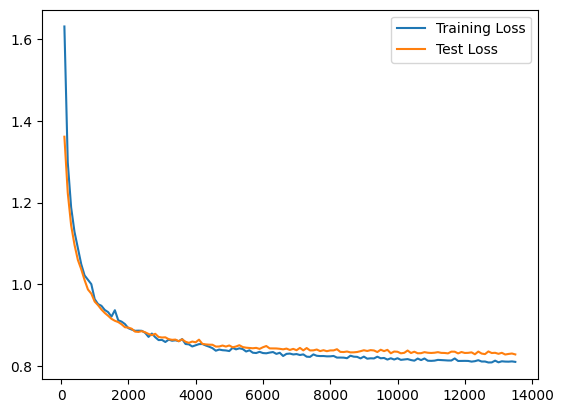

In [303]:
plt.plot(num_of_batches, training_loss_arr, label='Training Loss')
plt.plot(num_of_batches, test_loss_arr, label='Test Loss')
plt.legend()
plt.show()

### Step 4
Test your model's accuracy

In [304]:
total = 0
accurate = 0
for i, test_data in enumerate(test_loader):
    test_inputs, test_labels = test_data
    for test_input, test_label in zip(test_inputs, test_labels):
        test_output = model(test_input.view(-1, 28*28))
        if torch.argmax(test_output) == test_label:
            accurate += 1
        total += 1
print(accurate/total)

0.9817


Final: 28*28 => 2000 => 80 => 10 Epoch: 15
Net3 => 0.9817 9m 45s (Adam)

28*28 => 2000 => 80 => 10 Epoch: 5
Net1 => 0.7892 3m 14s
Net2 => 0.9596 3m 15s
Net3 => 0.9719 3m 14s (Adam)
Net3 => 0.9796 3m 14s + 3m 14s (Adam) (2)
Net3 => 0.9827 3m 14s + 3m 14s + 3m 15s (Adam) (3)
Net3 => 0.9829 3m 14s + 3m 14s + 3m 15s + 3m 16s (Adam) (4)
Net3 => 0.9695 3m 6s (SGD)

28*28 => 256 => 256 => 32 => 10 Adam Epoch: 5
Net4 => 0.9626 1m 38s

28*28 => 512 => 512 => 64 => 10 Adam Epoch: 5
Net4 => 0.9691 2m 12s

28*28 => 128 => 256 => 128 => 64 => 10 Adam Epoch: 5
Net5 => 0.9585 1m 34s


### Step 5

Get some training or test data samples to visualize the predictions.

In [305]:
def TakesamplesfromNthBatch(loader,N,model):
    
    inputsout=[]
    labelsout=[]
    
    for i,data in enumerate(train_loader):
        inputs, labels = data
        inputsout=inputs.squeeze().numpy()
        labelsout=labels.numpy()    
           
        if i==N:
            prediction = model(inputs.view(-1, 784))
            predictionout = np.argmax(prediction.detach().cpu().numpy(),axis=1) 
            break

    return inputsout, labelsout, predictionout

Batch_Size=  64


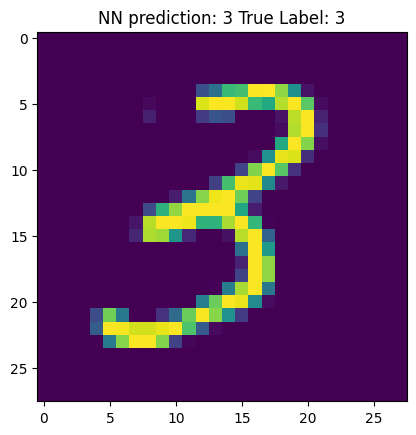

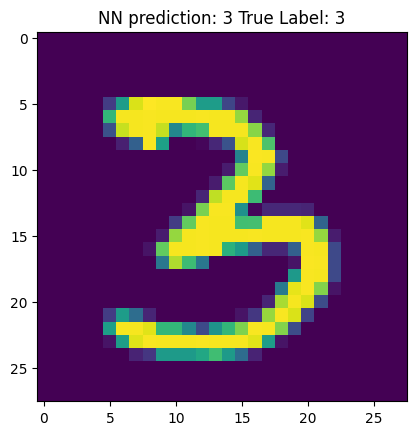

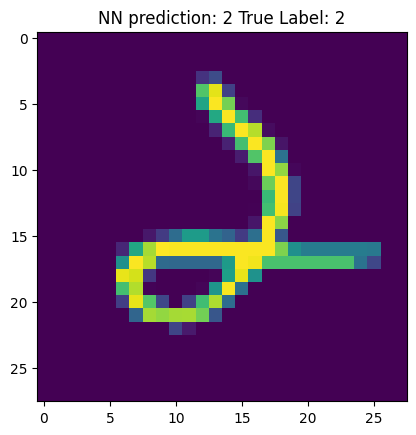

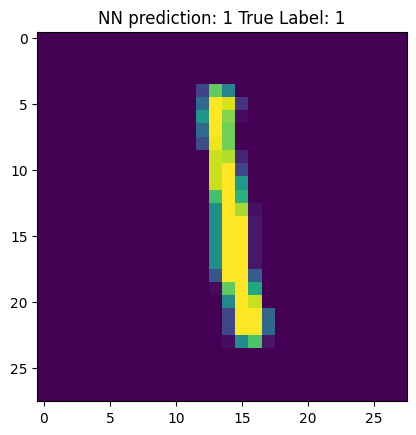

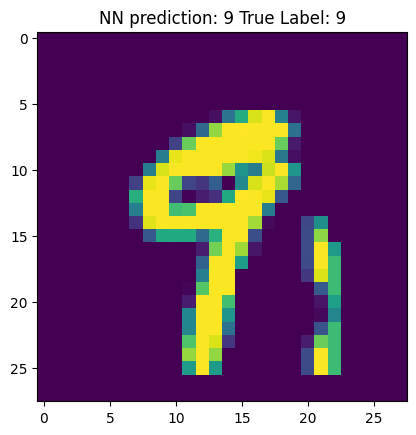

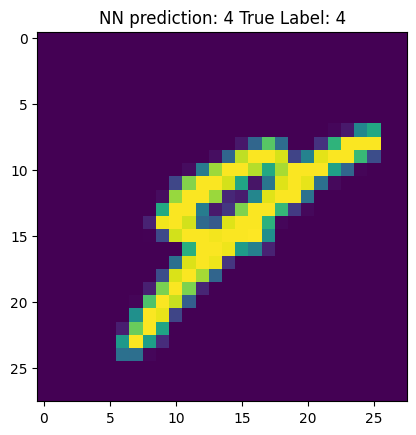

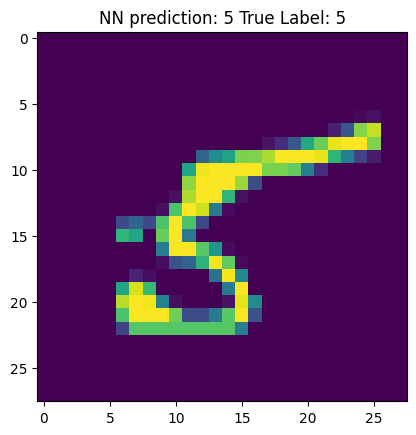

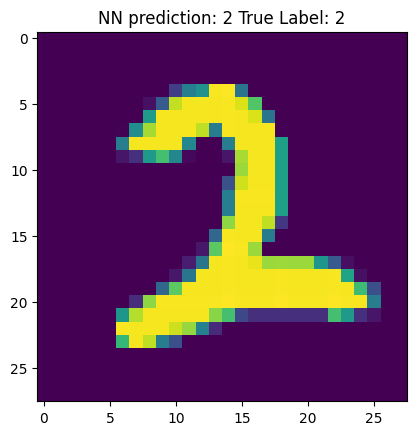

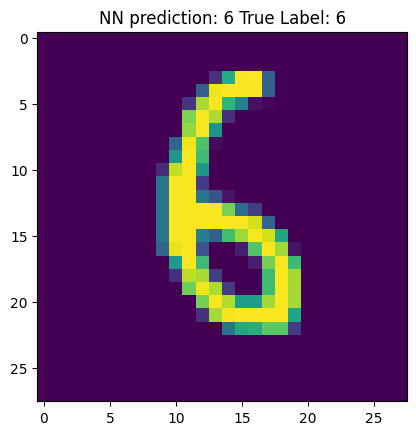

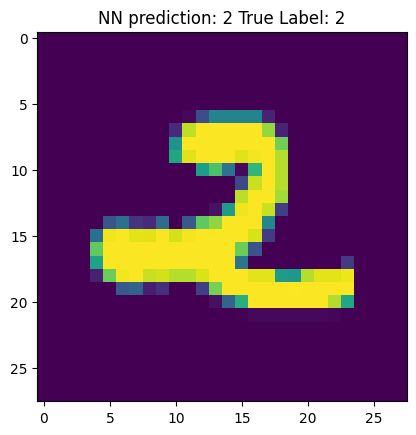

In [306]:
trial_input,trial_labels,trial_prediction = TakesamplesfromNthBatch(train_loader,1,model)
print('Batch_Size= ', batch_size)

numberIntheBatch=0
Nofexamples=10
for i in range(Nofexamples):    
    
    plt.figure()
    imgplot = plt.imshow(trial_input[numberIntheBatch])
    plt.title(f"NN prediction: {trial_prediction[numberIntheBatch]} True Label: {trial_labels[numberIntheBatch]}")
    numberIntheBatch=numberIntheBatch+1